<!--NOTEBOOK_HEADER-->
*This notebook contains course material from [CBE 20255 Introduction to Chemical Engineering Analysis](http://jckantor.github.io/CBE20255/) 
by Jeffrey Kantor (jeff at nd.edu); the content is available [on GitHub](https://github.com/jckantor/CBE20255).
The text is released under the [CC-BY-NC-ND-4.0 license](https://creativecommons.org/licenses/by-nc-nd/4.0/legalcode),
and code is released under the [MIT license](https://opensource.org/licenses/MIT).*


<!--NAVIGATION-->
< [Henry's Law Constants](http://nbviewer.jupyter.org/github/jckantor/CBE20255/blob/master/notebooks/07.05-Henry's-Law-Constants.ipynb) | [Contents](toc.ipynb) | [Bubble and Dew Points for Binary Mixtures](http://nbviewer.jupyter.org/github/jckantor/CBE20255/blob/master/notebooks/07.07-Bubble-and-Dew-Points-for-Binary-Mixtures.ipynb) ><p><a href="https://colab.research.google.com/github/jckantor/CBE20255/blob/master/notebooks/07.06-Binary-Phase-Diagrams-for-Ideal-Mixtures.ipynb"><img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab" title="Open in Google Colaboratory"></a>

# Binary Phase Diagrams for Ideal Mixtures

## Summary

This notebook shows how to use Raoult's Law and Antoine's equations to calculate Pxy, Txy, and xy diagrams for binary mixtures. The video is used with permission from [LearnChemE](http://learncheme.com/), a project at the University of Colorado funded by the National Science Foundation and the Shell Corporation.

## Introduction

For binary mixtures, Raoult's law provides a very useful equilibrium relationship between pressure, temperature, and composition of liquid and vapor phases. This relationship can be expressed as a set of equations, or graphically as

* **Pxy Diagram** relationship of pressure, liquid, and vapor composition at fixed temperature.
* **Txy Diagram** relationship of temperature, liquid, and vapor composition at fixed pressure.
* **xy Diagram** relationhip between liquid and vapor phase composition, usually plotted at fixed pressure.

The following [video](https://www.youtube.com/watch?v=E_Vuz8cfbEo&feature=youtu.be) from [LearnChemE](http://www.learncheme.com/) gives a brief introduction.

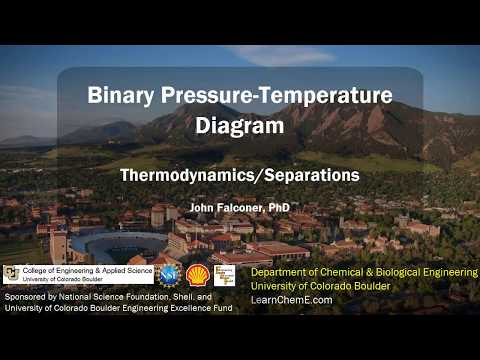

In [57]:
from IPython.display import YouTubeVideo
YouTubeVideo('E_Vuz8cfbEo') 

## Antoine's Equation

The calculations in this notebook use Antoine's equation to compute the saturation vapor pressure for a given temperature, and solves Antoine's equation for the saturation temperature for a  given pressure.

For this purpose, we create a simple Python class to store data for a set of species, and to provide functions to compute saturation pressures and temperatures. Python class is a more advanced aspect of Python programming that has been deliberately avoided in most of the notebooks in this respository. In this particular instance, however, the use of a class significantly streamlines the notebook.

The [thermo](https://pypi.org/project/thermo/) library is a complete implementation of a chemical property dataset in Python.

In [ ]:
from scipy.optimize import brentq

class Species(object):
  
  def __init__(self, name='no name', Psat=lambda T: null):
    self.name = name
    self.Psat = Psat
  
  # compute saturation pressure given temperature. 
  def Psat(self, T):
    raise Exception('Psat() has not been defined for ' + self.name)
  
  # compute saturation temperature given pressure
  def Tsat(self, P):
    return brentq(lambda T: self.Psat(T) - P, -50, 200)


acetone  = Species('acetone',  lambda T: 10**(7.02447 - 1161.0/(T + 224)))
benzene  = Species('benzene',  lambda T: 10**(6.89272 - 1203.531/(T + 219.888)))
ethanol  = Species('ethanol',  lambda T: 10**(8.04494 - 1554.3/(T + 222.65)))
hexane   = Species('hexane',   lambda T: 10**(6.88555 - 1175.817/(T + 224.867)))
toluene  = Species('toluene',  lambda T: 10**(6.95808 - 1346.773/(T + 219.693)))
p_xylene = Species('p_xylene', lambda T: 10**(6.98820 - 1451.792/(T + 215.111)))

In the following cell we choose specific species to use as components `A` and `B` in subsequent calculations for thsi notebook. 

In [59]:
A = acetone
B = ethanol

# report normal boiling points
for s in [A,B]:
  print('Normal boiling point of', s.name, ':', round(s.Tsat(760),1), 'deg C')


Normal boiling point of acetone : 56.2 deg C
Normal boiling point of ethanol : 78.3 deg C


## Binary Mixtures

For an ideal **binary mixture** of $A$ and $B$, the vapor phase pressure $P$ is the sum of component partial pressures $p_A$ and $p_B$

\begin{equation}
P = p_A + p_B
\end{equation}

Raoult's law, in turn, says for ideal mixtures

\begin{align*}
p_A & = x_A P^{sat}_A(T) \\
p_B & = x_B P^{sat}_B(T)
\end{align*}

Eliminate partial pressures and obtain an expression for total vapor pressure.

\begin{equation}
P = \underbrace{x_A P_A^{sat}(T)}_{p_A = y_AP} + \underbrace{x_B P_A^{sat}(T)}_{p_B = y_BP}
\end{equation}

For binary mixtures, the substitutions $x_B = 1-x_A$ and $y_B = 1 - y_A$ give an expression for total pressure as a function of composition $x_A$ and temperature.

\begin{equation}
P = \underbrace{x_A P_A^{sat}(T)}_{p_A = y_AP}+ \underbrace{(1-x_A) P_A^{sat}(T)}_{p_B=(1-y_B)P}
\end{equation}

In the Raoult's Law notebook, we demonstrated this relationship by plotting $P$, $p_A$, and $p_B$ as functions of $x_A$ at a fixed temperature.

The next step is to select a temperature $T$ and run the following cell. This cell will  evaluate and display $P$, $p_A$ and $p_B$ functions of liquid phase mole fraction $x_A$.

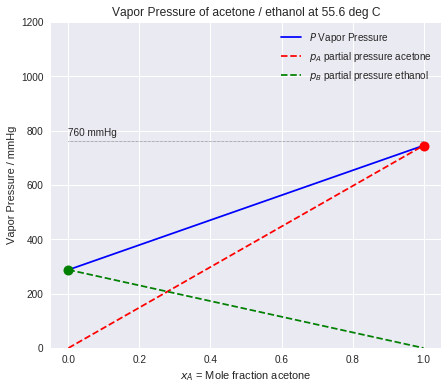

In [60]:
#@title Raoult's Law { run: "auto", vertical-output: true, form-width: "500px"}
#@markdown Adjust the slider to set the liquid temperature.
T = 55.6 #@param {type:"slider", min:30, max:80, step:0.2}

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# compute partial pressures and total pressure
xA = np.linspace(0,1)
pA = xA*A.Psat(T)
pB = (1-xA)*B.Psat(T)
Pv = pA + pB

# create plot
plt.figure(figsize=(7,6))
plt.plot(xA, Pv,'b')
plt.plot(xA, pA,'r--')
plt.plot(xA, pB,'g--')

# mark pure component saturation pressures
plt.plot(0, B.Psat(T), 'g.', ms=20)
plt.plot(1, A.Psat(T), 'r.', ms=20)

# annotate the plot
plt.plot([0,1],[760,760],'k:', lw=0.5)
plt.text(0, 780, '760 mmHg')
plt.ylim(0, 1200)
plt.xlabel('$x_A$ = Mole fraction ' + A.name)
plt.ylabel('Vapor Pressure / mmHg')
plt.title('Vapor Pressure of '+A.name+' / '+B.name+
          ' at {:.1f} deg C'.format(T))
plt.legend(['$P$ Vapor Pressure',
            '$p_A$ partial pressure ' + A.name,
            '$p_B$ partial pressure ' + B.name])
plt.show()

**Thing to Do / Things to Think About**

1. Use the temperature slider to determine the approximate boiling point of pure acetone.
2. What is the approximate boiling point of an acetone/ethanol mixture that is 35 mole% acetone? 
3. What is the corresponding vapor phase composition?

The dashed lines denote the partial presssures of $A$ and $B$. This information can be used compute the vapor phase composition

\begin{align*}
y_A & = \frac{p_A}{p_A + p_B} = \frac{p_A}{P} \\
\end{align*}

This information can be added to the plot  by computing $y_A$ and then plotting coordinate pairs $(y_A, P)$.

To read this diagram, start with a value of the liquid phase composition, $x_A$, look up to find the vapor pressure, then look right to find the vapor composition in equilibrium with the liquid phase.



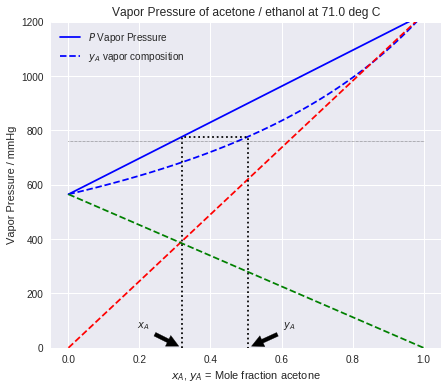

In [61]:
#@title Vapor Phase Composition { run: "auto", vertical-output: true }
T = 71 #@param {type:"slider", min:30, max:80, step:1}
xA = 0.32 #@param {type:"slider", min:0, max:1, step:0.01}
show_partial_pressures = True #@param {type:"boolean"}
show_tie_line = True #@param {type:"boolean"}

xA_save = xA

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# compute partial pressures and total pressure
xA = np.linspace(0,1)
pA = xA*A.Psat(T)
pB = (1-xA)*B.Psat(T)
Pv = pA + pB
yA = pA/Pv

# create plot
plt.figure(figsize=(7,6))
plt.plot(xA, Pv, 'b')
plt.plot(yA, Pv, 'b--')
   
# annotate the plot
plt.plot([0,1], [760,760], 'k:', lw=0.5)
plt.ylim(0, 1200)
plt.xlabel('$x_A$, $y_A$ = Mole fraction ' + A.name)
plt.ylabel('Vapor Pressure / mmHg')
plt.title('Vapor Pressure of '+A.name+' / '+B.name+
          ' at {:.1f} deg C'.format(T))
plt.legend(['$P$ Vapor Pressure',
            '$y_A$ vapor composition'])

if show_partial_pressures:
    plt.plot(xA, pA, 'r--')
    plt.plot(xA, pB, 'g--')

# show how to use
if show_tie_line:
    xA = xA_save
    pA = xA*A.Psat(T)     # partial pressure A
    pB = (1-xA)*B.Psat(T) # partial pressure B
    Pv = pA + pB          # vapor pressure
    yA = pA/Pv            # vapor phase composition            )
    plt.plot([xA, xA, yA, yA], [0, Pv, Pv, 0], 'k:')
    dx = -40 if xA < yA else 50
    plt.annotate('$x_A$', xy=(xA,0), xycoords='data',
             xytext=(dx-5,20), textcoords='offset pixels',
             arrowprops=dict(facecolor='black', shrink=0.1))
    plt.annotate('$y_A$', xy=(yA,0), xycoords='data',
             xytext=(-dx-5,20), textcoords='offset pixels',
             arrowprops=dict(facecolor='black', shrink=0.1))

plt.show()

**Thing to Do / Things to Think About**

1. You're in a warehouse and come across a sealed tank labeled 60% acetone in ethanol. It's 30 degrees C in the warehouse. What is the pressure in the tank?

2. Suppose you have a liquid acetone/ethanol mixture that is 50 mole% acetone. At a pressure of 1 atm, at what temperature does the mixture boil? What is the vapor phase composition?

3. A chemical process produces an acetone/ethanol vapor stream that is 50 mole% acetone. At what temperature does it begin to condense?

## Diagrams for Binary Mixtures

For a **binary mixture** of $A$ and $B$, Raoult's law reads

\begin{equation}
P = x_A P_A^{sat}(T) + x_B P_A^{sat}(T)
\end{equation}

Substituting $x_B = 1-x_A$

\begin{equation}
P = x_A P_A^{sat}(T) +  (1-x_A) P_A^{sat}(T)
\end{equation}

Solving for $x_A$

\begin{equation}
x_A = \frac{P - P_B^{sat}(T)}{P_A^{sat}(T) - P_B^{sat}(T)}
\end{equation}

This equation provides an alternative method of creating the diagrams shown above. fixing temperature $T$, the above equation is  a linear function of $P$ that goes through the points $(x_A,P) = (0, P^{sat}_B(T))$ and $(x_A,P) =(1, P^{sat}_A(T))$.

From Raolt's law we know

\begin{equation}
 y_A P  = x_A P_A^{sat}(T) \implies y_A  = x_A \frac{ P_A^{sat}(T)}{P}
\end{equation}

Putting these all together

\begin{align*}
x_A & = \frac{P - P_B^{sat}(T)}{P_A^{sat}(T) - P_B^{sat}(T)}\\
y_A & = \frac{P - P_B^{sat}(T)}{P_A^{sat}(T) - P_B^{sat}(T)}\frac{P_A^{sat}(T)}{P}
\end{align*}

This gives the liquid phase and vapor phase compositions, $x_A$ and $y_A$ respectively, in terms pressure and temperature. This is very useful for the analysis of separation processes. From these equations we can construct three plots:

* **Pxy** Fix $T$. Plot $x_A$ and $y_A$ as functions of $P$ in the range $P^{sat}_B(T)$ to $P^{sat}_A(T)$.
* **Txy** Fix $P$. Plot $x_A$ and $y_A$ as functions of $T$ in the range $T^{sat}_B(P)$ to $T^{sat}_A(P)$.
* **xy** Fix either $T$ or $P$. Plot $y_A$ as a function of $x_A$ for $T$ in the range $T^{sat}_B(P)$ to $T^{sat}_A(P)$ or $P$ in the range $P^{sat}_B(T)$ to $P^{sat}_A(T)$.

The next cells demonstrate each of these plots.


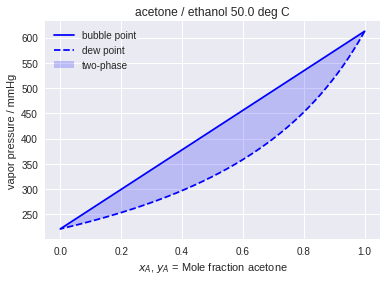

In [111]:
#@title Pxy Diagram { run: "auto", vertical-output: true }
T = 50 #@param {type:"slider", min:30, max:80, step:1}

import matplotlib.pyplot as plt
import numpy as np

def Pxy(A, B, T=0): # , z=0, P=760):
    Pp = np.linspace(A.Psat(T), B.Psat(T))
    xA = (Pp - B.Psat(T))/(A.Psat(T) - B.Psat(T))
    yA = xA*A.Psat(T)/Pp
    plt.plot(xA, Pp, 'b')
    plt.plot(yA, Pp, 'b--')
    plt.gca().fill_betweenx(Pp, xA, yA, facecolor='blue', alpha=0.2)
    plt.xlabel('$x_A$, $y_A$ = Mole fraction ' + A.name)
    plt.ylabel('vapor pressure / mmHg')
    plt.title(A.name + ' / ' + B.name + ' {:.1f} deg C'.format(T))
    plt.legend(['bubble point', 'dew point', 'two-phase'])

Pxy(A, B, T)

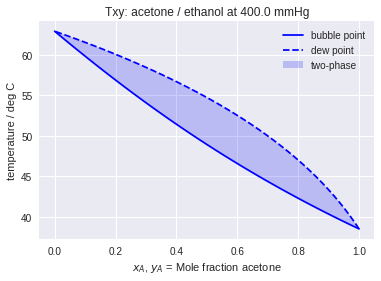

In [109]:
#@title Txy Diagram { run: "auto", vertical-output: true }
P = 400 #@param {type:"slider", min:200, max:1200, step:10}

import matplotlib.pyplot as plt
import numpy as np

def Txy(A, B, P=760):  #, z=0, T=0):
    Tp = np.linspace(A.Tsat(P), B.Tsat(P))
    xA = (P - B.Psat(Tp))/(A.Psat(Tp) - B.Psat(Tp))
    yA = xA*A.Psat(Tp)/P
    plt.plot(xA, Tp, 'b')
    plt.plot(yA, Tp, 'b--')
    plt.gca().fill_betweenx(Tp, xA, yA, facecolor='blue', alpha=0.2)
    plt.xlabel('$x_A$, $y_A$ = Mole fraction ' + A.name)
    plt.ylabel('temperature / deg C')
    plt.title('Txy: '+A.name+' / '+B.name+' at {:.1f} mmHg'.format(P))
    plt.legend(['bubble point', 'dew point', 'two-phase'])
    
Txy(A, B, P)

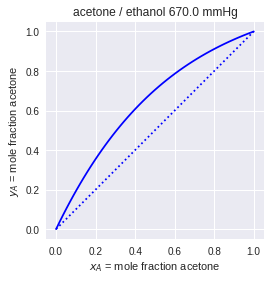

In [122]:
#@title xy Diagram for a given pressure { run: "auto", vertical-output: true }
P = 670 #@param {type:"slider", min:200, max:1200, step:10}

import matplotlib.pyplot as plt
import numpy as np

def xy(A, B, P=None, T=None):  #, z=0, T=0):
  title = A.name + ' / ' + B.name
  if P is not None:
    T = np.linspace(A.Tsat(P), B.Tsat(P))
    title = title + ' {:.1f} mmHg'.format(P)
  elif T is not None:
    P = np.linspace(A.Psat(T), B.Psat(T))
    title = title + ' {:.1f} deg C'.format(T)
  xA = (P - B.Psat(T))/(A.Psat(T) - B.Psat(T))
  yA = xA*A.Psat(T)/P
  plt.plot(xA, yA, 'b')
  plt.plot([0,1],[0,1],'b:')
  plt.gca().set_aspect('equal','box')
  plt.xlabel('$x_A$ = mole fraction ' + A.name)
  plt.ylabel('$y_A$ = mole fraction ' + A.name)
  plt.title(title)
  
xy(A, B, P=P)

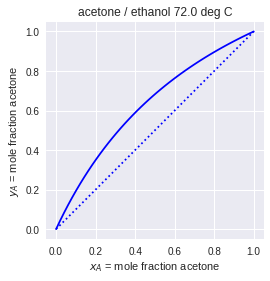

In [123]:
#@title xy Diagram for a given temperature { run: "auto", vertical-output: true }
T = 72 #@param {type:"slider", min:20, max:80, step:1}

  
xy(A, B, T=T)

**Thing to Do / Things to Think About**

1. Why are the two curves labeled the 'dew point' and 'bubble point'? 

2. Why is the region between the bubble and dew points called the two-phase region? Can a single phase actually exist that with a composition corresponding to a point between the two curves?

3. Where are the liquid and vapor phases located on the Pxy diagram? On the Txy diagram?

4. Use the above charts to answer the questions appearing earlier in this notebook. Which chart (or charts) makes it most convenient to answer each question?


## Comparison to Experimental Data: Benzene/p-Xylene

The following cells show ideal mixture calculations for the benzene/p-xylene system which can be compared to [experimental data available here](http://www.ddbst.com/en/EED/VLE/VLE%20Benzene%3Bp-Xylene.php).

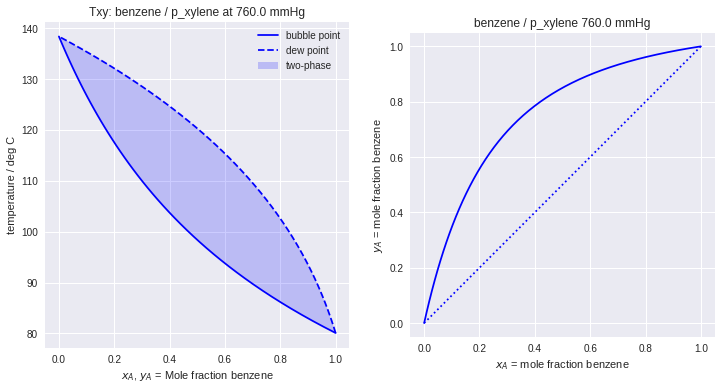

In [124]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
Txy(benzene, p_xylene, 760)
plt.subplot(1,2,2)
xy(benzene, p_xylene, P=760)

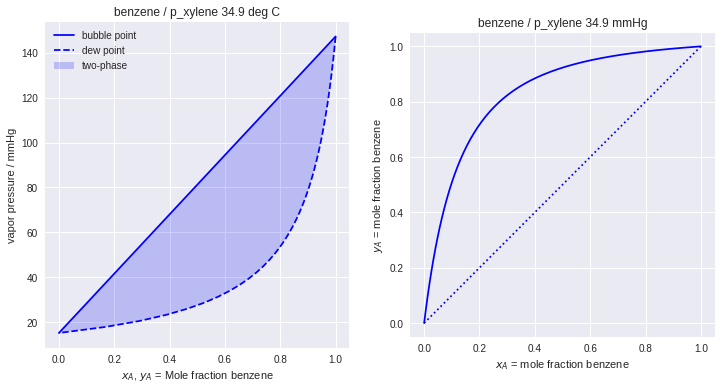

In [125]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
Pxy(benzene, p_xylene, T=308-273.15)
plt.subplot(1,2,2)
xy(benzene, p_xylene, P=308-273.15)

**Things to Do / Things to Think About **

1. Repeat these calculations for a different example from the [Dortmund Data Bank](http://www.ddbst.com/en/EED/VLE/VLEindex.php). 

## Flash

As a thought experiment, imagine you have a binary liquid mixture that with a composition of 50 mole% A, where A is the more volatile species. You heat the mixture in a sealed apparatus capable of maintaining constant pressure. 

1. You gradually heat the mixture until the first bubble forms. Where is the point located on the Txy diagram?  What is the composition of the bubble? What is the overall composition in the sealed vessel?

2. You continue heating the mixture until half of the mixture is evenly split between the liquid and vapor phases.  By evenly split, we mean the moles of vapor equals the moles of liquid.  What are the liquid and vapor phase compositions now? What is the overall composition?

3. You continue heating until the last drop of liquid. What are the compositions now?


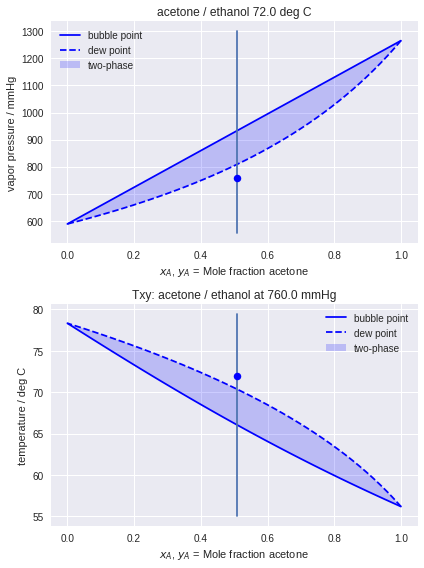

In [126]:
#@title PT Flash { run: "auto", vertical-output: true }
P = 760 #@param {type:"slider", min:200, max:1200, step:10}
T = 72 #@param {type:"slider", min:30, max:140, step:1}
z = 0.51 #@param {type:"slider", min:0, max:1, step:0.01}

import matplotlib.pyplot as plt
import numpy as np

def PTflash(A, B, P, T, z):
    xA = (P - B.Psat(T))/(A.Psat(T) - B.Psat(T))
    yA = xA*A.Psat(T)/P
    
    plt.figure(figsize=(6,8))
    plt.subplot(2,1,1)
    Pxy(A, B, T)
    plt.plot([z ,z], plt.ylim())
    if xA < z < yA:
        plt.plot([xA, yA], [P, P], 'b-', marker='.', ms=15)
    else:
        plt.plot(z, P, 'b.', ms=15)
        
    plt.subplot(2,1,2)
    Txy(A, B, P)
    plt.plot([z ,z], plt.ylim())
    if xA < z < yA:
        plt.plot([xA, yA], [T, T], 'b-', marker='.', ms=15)
    else:
        plt.plot(z, T, 'b.', ms=15)
    plt.tight_layout()
    
PTflash(A, B, P, T, z)


## Exercises

1. Modify this notebook to create Txy and xy diagrams for an acetaldehyde/ethanol mixture.  Create an x-y diagram, and compare to the experimental data avaiable here: S. G. D'Avila and R. S. F. Silva, "Isothermal vapor-liquid equilibrium data by total pressure method. Systems acetaldehyde-ethanol, acetaldehyde-water, and ethanol-water," Journal of Chemical & Engineering Data, vol. 15 (3), 421-424, 1970.

<!--NAVIGATION-->
< [Henry's Law Constants](http://nbviewer.jupyter.org/github/jckantor/CBE20255/blob/master/notebooks/07.05-Henry's-Law-Constants.ipynb) | [Contents](toc.ipynb) | [Bubble and Dew Points for Binary Mixtures](http://nbviewer.jupyter.org/github/jckantor/CBE20255/blob/master/notebooks/07.07-Bubble-and-Dew-Points-for-Binary-Mixtures.ipynb) ><p><a href="https://colab.research.google.com/github/jckantor/CBE20255/blob/master/notebooks/07.06-Binary-Phase-Diagrams-for-Ideal-Mixtures.ipynb"><img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab" title="Open in Google Colaboratory"></a>